In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iquitos_dataset = pd.read_csv("../dengueData/Iquitos/iquitos_training_data.csv")
print(iquitos_dataset.head())
print("Number of observations: ", len(iquitos_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  2000/2001            1      2000-07-01            0            0   
1  2000/2001            2      2000-07-08            0            0   
2  2000/2001            3      2000-07-15            0            0   
3  2000/2001            4      2000-07-22            0            0   
4  2000/2001            5      2000-07-29            0            0   

   denv3_cases  denv4_cases  other_positive_cases  total_cases  
0            0            0                     0            0  
1            0            0                     0            0  
2            0            0                     0            0  
3            0            0                     0            0  
4            0            0                     0            0  
Number of observations:  468


In [4]:
iquitos_cases = iquitos_dataset["total_cases"].values
print(iquitos_cases.shape)

(468,)


In [14]:
split_index = int(len(iquitos_cases)* 0.7)
window_size = 4
future_steps = 3
train = iquitos_cases[:split_index+window_size]

#Test goes from train to end - future_steps (as this data will be feed into the model)
#Expected is always future_steps ahead of test as this is the expected predictions
test = iquitos_cases[split_index+window_size:-future_steps]
expected = iquitos_cases[split_index+window_size+future_steps:]

print(train.shape)
print(test.shape)
print(expected.shape)

(331,)
(134,)
(134,)


E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=5.762028, expected=5.000000
predicted=3.217225, expected=2.000000
predicted=10.366029, expected=0.000000
predicted=8.005346, expected=1.000000
predicted=6.769014, expected=0.000000
predicted=4.985756, expected=14.000000
predicted=2.121466, expected=6.000000
predicted=2.025809, expected=10.000000
predicted=0.625479, expected=5.000000
predicted=9.160128, expected=12.000000
predicted=4.564201, expected=9.000000
predicted=9.462219, expected=5.000000
predicted=6.184062, expected=11.000000
predicted=10.342651, expected=2.000000
predicted=8.766721, expected=6.000000
predicted=6.750960, expected=7.000000
predicted=10.494079, expected=6.000000
predicted=3.895794, expected=5.000000
predicted=7.044108, expected=9.000000
predicted=6.452027, expected=5.000000
predicted=5.744017, expected=8.000000
predicted=5.866302, expected=3.000000
predicted=7.820793, expected=4.000000
predicted=5.424033, expected=11.000000
predicted=7.836261, expected=5.000000
predicted=4.407449, expected=8.000000
pred

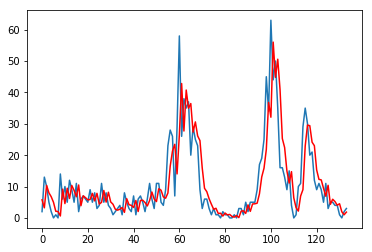

In [21]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps=4) #future_steps+1
    yhat = output[0][future_steps]
    
    predictions.append(yhat)
    obs = expected[t]
    history.append(test[t])
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(expected, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(expected, predictions)
print(mae)

8.313340028632313


In [24]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100

mape = mean_absolute_percentage_error(expected, predictions)
print(mape)

1.455321492440261e+17
